![image info](https://raw.githubusercontent.com/albahnsen/MIAD_ML_and_NLP/main/images/banner_1.png)

# Taller: Redes Neuronales

En este taller podrán poner en práctica sus conocimientos sobre la construcción e implementación de redes neuronales de una capa y multicapa. El taller está constituido por 4 puntos, en los cuales deberan seguir las intrucciones de cada numeral para su desarrollo.

## Datos predicción probabilidad de admisión a la universidad

En este taller se usará el conjunto de datos de admisiones a una universidad proveniente de la base de datos de Kaggle. Cada observación contiene la probabilidad de que un estudiante sea admitido por la universidad, dadas distintas variables predictoras como el puntaje del examén TOEFL y GRE, el promedio (GPA), entre otras. El objetivo es predecir la probabilidad de admissión de cada estudiante. Para más detalles pueden visitar el siguiente enlace: [datos](https://www.kaggle.com/mohansacharya/graduate-admissions).

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
#pip install livelossplot

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# Importación librerías
import numpy as np
import keras 
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from keras import initializers
from keras import optimizers
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout

from livelossplot import PlotLossesKeras
from tensorflow.keras.layers import Activation
import tensorflow as tf
from keras import backend as bac
import keras.optimizers as opts

from sklearn import metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error



In [ ]:
# Carga de datos de archivo .csv
data = pd.read_csv('https://raw.githubusercontent.com/albahnsen/MIAD_ML_and_NLP/main/datasets/universityGraduateAdmissions.csv', index_col=0)
data.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
Serial No.,,,,,,,,
1,337,118,4,4.5,4.5,9.65,1,0.92
2,324,107,4,4.0,4.5,8.87,1,0.76
3,316,104,3,3.0,3.5,8.00,1,0.72
4,322,110,3,3.5,2.5,8.67,1,0.80
5,314,103,2,2.0,3.0,8.21,0,0.65


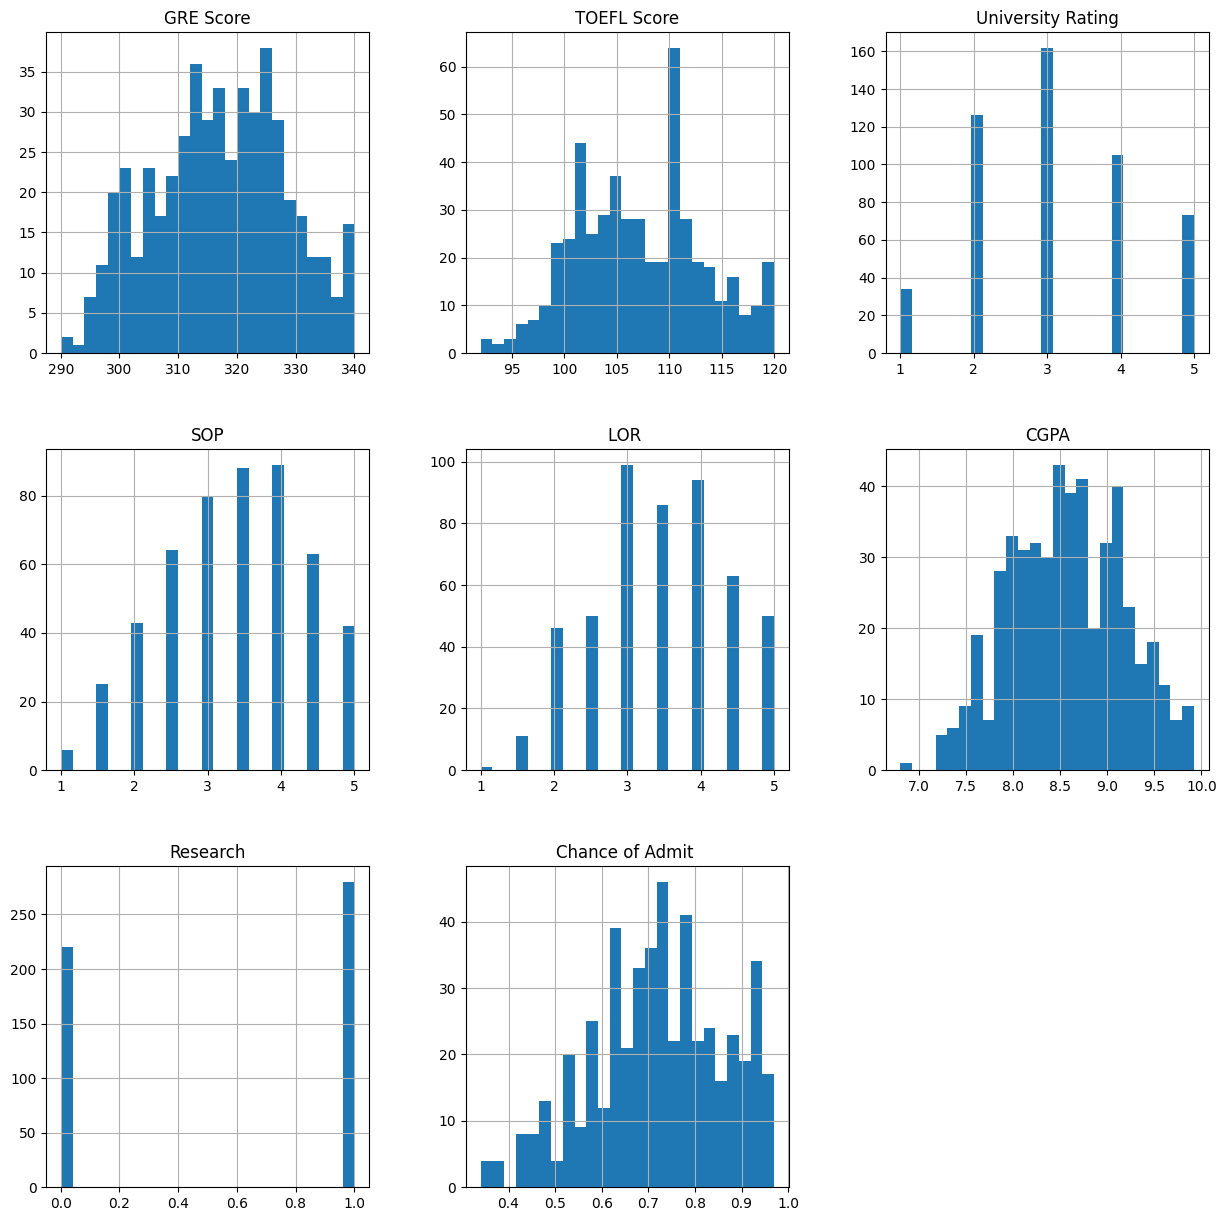

In [ ]:
# Hitogramas de las varaibles del dataset
data.hist(bins=25, figsize=(15,15))
plt.show()

In [ ]:
# Definición de variables predictoras (X)
X = data.drop(data.columns[-1], axis=1)
# Definición de variable de interés (y)
Y = data[data.columns[-1]]

In [ ]:
# Separación de variables predictoras (X) y variable de interés (y) en set de entrenamiento y test usandola función train_test_split
xTrain, xTest, yTrain, yTest = train_test_split(X,Y,test_size=0.3, random_state=22)

## Punto 1 - Red Neuronal de una capa

En la celda 1 creen una **red neuronal de una capa** con la librería Keras, que prediga la probabilidad de admisión de los estudiantes, usando los sets de entrenamiento y test definidos anteriormente. Pueden usar la función de perdida, el optimizador y el número de épocas que consideren pertinentes para el modelo, justificando su selección. Finalmente, grafiquen la pérdida del modelo vs el número de épocas en el set de entrenamiento y validación, y presenten el desempeño del modelo con las métricas error absoluto medio (MAE) y error cuadrático medio (MSE).

In [ ]:
# Definición de dimensiones de salida, varaibles de interés
output_var = 1
print(output_var, ' output variables')

# Definición de dimensiones de entrada, varaibles predictoras
dims = xTrain.shape[1]
print(dims, 'input variables')

1  output variables
7 input variables


In [ ]:
from sklearn.preprocessing import StandardScaler

# Definición de la función StandardScaler
scaler = StandardScaler()

# Transformación de los set de entrenamiento y test
xTrain_norm = pd.DataFrame(data=scaler.fit_transform(xTrain), columns=xTrain.columns, index=xTrain.index)
xTest_norm = pd.DataFrame(data=scaler.transform(xTest), columns=xTest.columns, index=xTest.index)

In [ ]:
bac.clear_session()
# Definición red neuronal con la función Sequential()
model = Sequential()
# Definición de la capa densa con un tamaño de salida igual a output_var y un input_shape de dims
model.add(Dense(output_var, input_shape=(dims,)))
# Impresión de la arquitectura de la red neuronal
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 8         
                                                                 
Total params: 8
Trainable params: 8
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
model.compile(optimizer='sgd', loss='mean_squared_error')

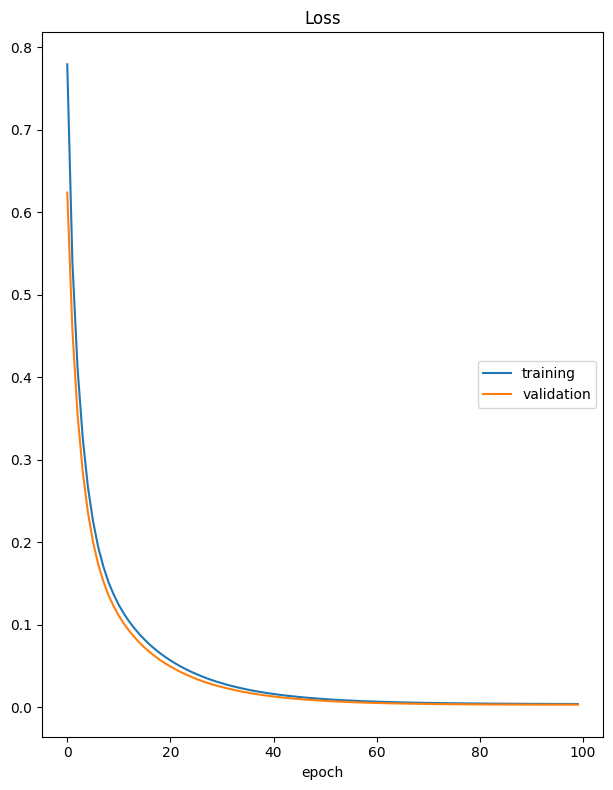

Loss
	training         	 (min:    0.004, max:    0.779, cur:    0.004)
	validation       	 (min:    0.003, max:    0.624, cur:    0.003)
11/11 [==============================] - 0s 45ms/step - loss: 0.0040 - val_loss: 0.0031


In [ ]:
# Entrenamiento de la red neuronal con 100 épocas
from livelossplot import PlotLossesKeras
model.fit(xTrain_norm, yTrain, 
          verbose=1, 
          epochs=100,
          validation_data=(xTest_norm, yTest),
          callbacks=[PlotLossesKeras()])

In [ ]:
y_predict = model.predict(xTest_norm).ravel()
p1 = mean_squared_error(yTest, y_predict)
print(f'MAE: {mean_absolute_error(yTest, y_predict)}')
print(f'MSE: {mean_squared_error(yTest, y_predict)}')

5/5 [==============================] - 0s 2ms/step
MAE: 0.041810942387580874
MSE: 0.003122000049783149


In [ ]:
model.compile(optimizer='RMSprop', loss='mean_squared_error')

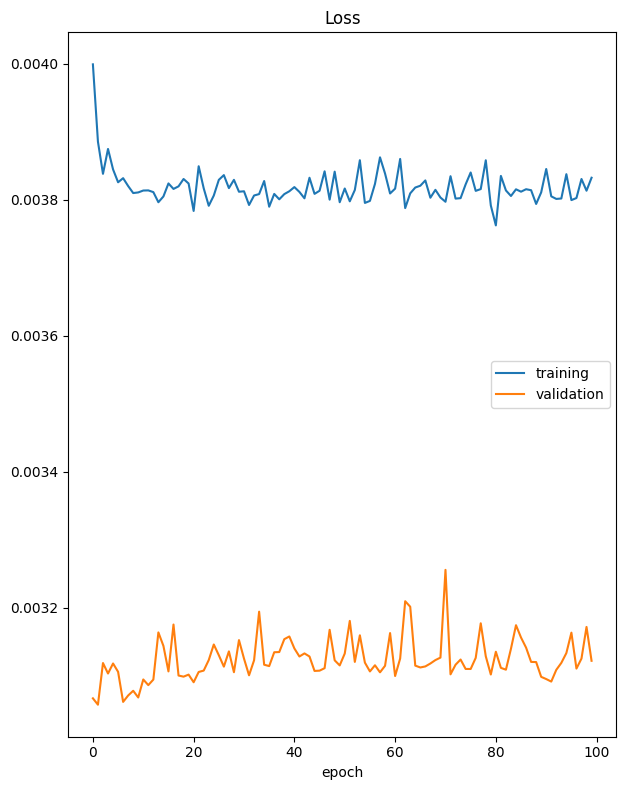

Loss
	training         	 (min:    0.004, max:    0.004, cur:    0.004)
	validation       	 (min:    0.003, max:    0.003, cur:    0.003)
11/11 [==============================] - 0s 44ms/step - loss: 0.0038 - val_loss: 0.0031


In [ ]:
# Entrenamiento de la red neuronal con 100 épocas
model.fit(xTrain_norm, yTrain, 
          verbose=1, 
          epochs=100,
          validation_data=(xTest_norm, yTest),
          callbacks=[PlotLossesKeras()])

In [ ]:
y_predict = model.predict(xTest_norm).ravel()
p1 = mean_squared_error(yTest, y_predict)
print(f'MAE: {mean_absolute_error(yTest, y_predict)}')
print(f'MSE: {mean_squared_error(yTest, y_predict)}')

5/5 [==============================] - 0s 3ms/step
MAE: 0.04090499877134959
MSE: 0.003121679474293628


In [ ]:
model.compile(optimizer='sgd', loss='mean_absolute_error')

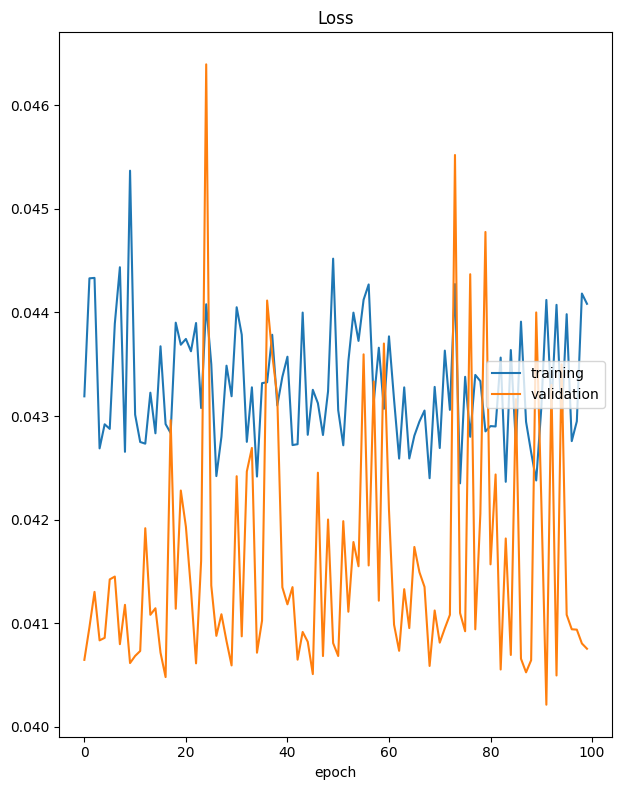

Loss
	training         	 (min:    0.042, max:    0.045, cur:    0.044)
	validation       	 (min:    0.040, max:    0.046, cur:    0.041)
11/11 [==============================] - 0s 47ms/step - loss: 0.0441 - val_loss: 0.0408


In [ ]:
# Entrenamiento de la red neuronal con 100 épocas
model.fit(xTrain_norm, yTrain, 
          verbose=1, 
          epochs=100,
          validation_data=(xTest_norm, yTest),
          callbacks=[PlotLossesKeras()])

In [ ]:
y_predict = model.predict(xTest_norm).ravel()
p1 = mean_squared_error(yTest, y_predict)
print(f'MAE: {mean_absolute_error(yTest, y_predict)}')
print(f'MSE: {mean_squared_error(yTest, y_predict)}')

5/5 [==============================] - 0s 3ms/step
MAE: 0.04075443298816682
MSE: 0.003384449342039176


Se hicieron pruebas para la función de pérdidas con MSE y MAE. El primero obtiene resultados muy estables, mientras que el segundo muestra pequeñas fluctuaciones en las diferentes épocas. Se puede ver que el resultado a nivel global del modelo mejora según la función de pérdida seleccionada. En el primer modelo se tuvo un menor MSE, mientras que en el segundo un menor MAE.

Para la función de optimizador se verificó el desempeño con SGD (gradiente descendiente) y el algoritmo de RMSprop, el cual es una extensión del primero. La diferencia está en el tamaño del paso, en el primero es constante y en el segundo se va ajustando para encontrar el punto óptimo. 

Finalmente, se seleccionó la función de pérdida 'mean_squared_error' y el optimizador 'sgd' al compilar el modelo. Esta combinación es una buena opción para problemas de regresión simples, como es el caso que nos ocupa con una sola neurona. 

La función de pérdida es una medida apropiada de la diferencia entre los valores predichos y los valores reales, y el optimizador SGD es eficiente y efectivo en la optimización de los pesos del modelo durante el entrenamiento.

Se optó por 100 épocas para permitir que el modelo tenga suficiente tiempo para ajustarse a los datos de entrenamiento y lograr un buen rendimiento en los datos de prueba, no obstante, se puede ver que cerca a 30 épocas se vuelve asintótica, lo cual indica que se pueden detener las iteraciones. 

## Punto 2 - Red Neuronal multicapa

En la celda 2 creen una **red neuronal con dos capas** con la librería Keras, que prediga la probabilidad de admisión de los estudiantes usando los sets de entrenamiento y test definidos anteriormente. Pueden usar la función de perdida, el optimizador, el número de épocas y el número de neuronas que consideren pertinentes para el modelo, justificando su selección. Finalmente, grafiquen la pérdida del modelo vs el número de épocas en el set de entrenamiento y validación, y presenten el desempeño del modelo con las métricas error absoluto medio (MAE) y error cuadrático medio (MSE).

In [ ]:
# Celda 2
bac.clear_session()
# Definición red neuronal con la función Sequential()
model = Sequential()

# Definición de la capa densa con un tamaño de salida igual a output_var y un input_shape de dims
model.add(Dense(256, input_shape=(dims,),activation='relu'))
model.add(Dense(256,activation='relu'))
model.add(Dense(output_var))
model.add(Activation('relu'))

# Impresión de la arquitectura de la red neuronal
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               2048      
                                                                 
 dense_1 (Dense)             (None, 256)               65792     
                                                                 
 dense_2 (Dense)             (None, 1)                 257       
                                                                 
 activation (Activation)     (None, 1)                 0         
                                                                 
Total params: 68,097
Trainable params: 68,097
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
model.compile(optimizer='sgd', loss='mean_squared_error')

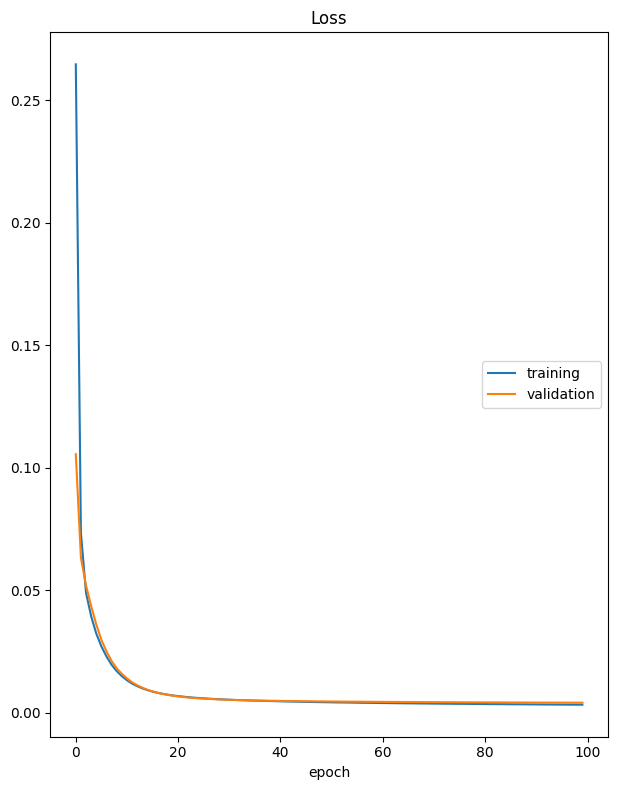

Loss
	training         	 (min:    0.003, max:    0.265, cur:    0.003)
	validation       	 (min:    0.004, max:    0.106, cur:    0.004)
11/11 [==============================] - 0s 49ms/step - loss: 0.0034 - val_loss: 0.0042


In [ ]:
model.fit(xTrain_norm, yTrain, 
          verbose=1, 
          epochs=100,
          validation_data=(xTest_norm, yTest),
          callbacks=[PlotLossesKeras()])

In [ ]:
y_predict = model.predict(xTest_norm).ravel()
p2 = mean_squared_error(yTest, y_predict)
print(f'MAE: {mean_absolute_error(yTest, y_predict)}')
print(f'MSE: {mean_squared_error(yTest, y_predict)}')

5/5 [==============================] - 0s 3ms/step
MAE: 0.04919666653474172
MSE: 0.004170807464340678


In [ ]:
model.compile(optimizer='sgd', loss='mean_absolute_error')

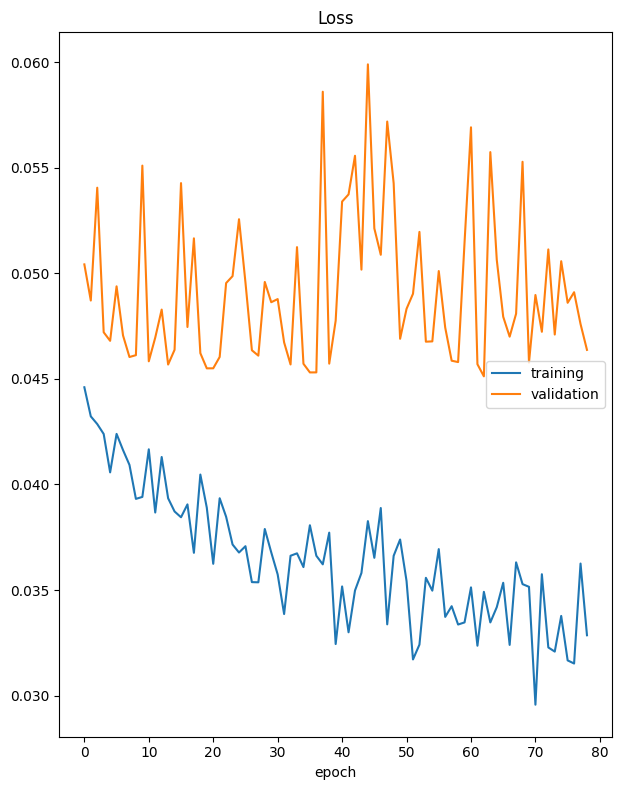

Loss
	training         	 (min:    0.030, max:    0.045, cur:    0.033)
	validation       	 (min:    0.045, max:    0.060, cur:    0.046)
11/11 [==============================] - 1s 51ms/step - loss: 0.0329 - val_loss: 0.0464
Epoch 80/100
 1/11 [=>............................] - ETA: 0s - loss: 0.0282

In [ ]:
model.fit(xTrain_norm, yTrain, 
          verbose=1, 
          epochs=100,
          validation_data=(xTest_norm, yTest),
          callbacks=[PlotLossesKeras()])

In [ ]:
y_predict = model.predict(xTest_norm).ravel()
p2 = mean_squared_error(yTest, y_predict)
print(f'MAE: {mean_absolute_error(yTest, y_predict)}')
print(f'MSE: {mean_squared_error(yTest, y_predict)}')

Para la red multicapa se utilizó las funciones de pérdidas MSE y MAE. La primera arrojó resultados muy estables y la segunda con mayores fluctuaciones. A nivel de resultados, ambos indicadores muestran resultados muy parecidos; no obstante, frente al modelo de una capa, no se mejoran los indicadores.

En este modelo, se agregaron dos capas con 256 neuronas cada una y se utilizó la función de activación 'relu'. La función de activación 'relu' se utiliza comúnmente en capas ocultas para introducir no-linealidad en el modelo y permitir que el modelo aprenda patrones más complejos en los datos.

El modelo se entrenó durante 100 épocas, que es un número adecuado para permitir que el modelo se ajuste bien a los datos de entrenamiento y generalice bien a los datos de prueba. Sin embargo, al igual que con el modelo de una capa, el número óptimo de épocas puede variar según el conjunto de datos y la complejidad del modelo. Por lo tanto, es posible que sea necesario ajustar este parámetro para obtener un mejor rendimiento en otros conjuntos de datos o problemas de regresión más complejos.

## Punto 3  - Red Neuronal multicapa

En la celda 3 creen **una red neuronal con más de una capa con la librería Keras, usando early stopping y dropout,** que prediga la probabilidad de admisión de los estudiantes con los sets de entrenamiento y test definidos anteriormente. Pueden usar la función de perdida, el optimizador, el número de épocas y el número de neuronas que consideren pertinentes para el modelo, justificando su selección. Finalmente, grafiquen la pérdida del modelo vs el número de épocas en el set de entrenamiento y validación, y presenten el desempeño del modelo con las métricas error absoluto medio (MAE) y error cuadrático medio (MSE).

In [27]:
# Celda 3
from keras.callbacks import EarlyStopping, ModelCheckpoint

bac.clear_session()

# Definición red neuronal con la función Sequential()
model = Sequential()

# Definición de la capa densa con un tamaño de salida igual a output_var y un input_shape de dims
model.add(Dense(100, input_shape=(dims,),activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(100,activation='relu'))
model.add(Dense(output_var))
model.add(Activation('relu'))

# Impresión de la arquitectura de la red neuronal
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 100)               800       
                                                                 
 dropout (Dropout)           (None, 100)               0         
                                                                 
 dense_1 (Dense)             (None, 100)               10100     
                                                                 
 dense_2 (Dense)             (None, 1)                 101       
                                                                 
 activation (Activation)     (None, 1)                 0         
                                                                 
Total params: 11,001
Trainable params: 11,001
Non-trainable params: 0
_________________________________________________________________
None


In [28]:
# Definición de la función EarlyStopping para considerar durante el entrenamiento
early_stop = EarlyStopping(monitor='val_loss', patience=5, verbose=1) 

# Definición de la función ModelCheckpoint para guardar el modelo con mejor desempeño
fBestModel = 'best_model.h5'
best_model = ModelCheckpoint(fBestModel, verbose=0, save_best_only=True)

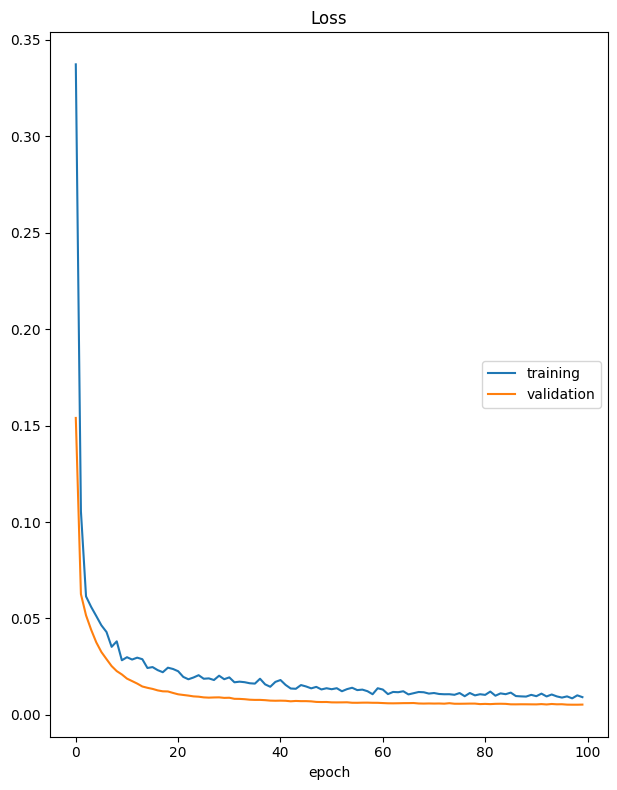

Loss
	training         	 (min:    0.009, max:    0.337, cur:    0.009)
	validation       	 (min:    0.005, max:    0.154, cur:    0.005)
11/11 [==============================] - 0s 47ms/step - loss: 0.0092 - val_loss: 0.0053


In [29]:
model.compile(optimizer='sgd', loss='mean_squared_error')
model.fit(xTrain_norm, yTrain, 
          verbose=True, 
          epochs=100,
          validation_data=(xTest_norm, yTest),
          callbacks=[PlotLossesKeras(), best_model, early_stop])

In [ ]:
y_predict = model.predict(xTest_norm).ravel()
p3 = mean_squared_error(yTest, y_predict)
print(f'MAE: {mean_absolute_error(yTest, y_predict)}')
print(f'MSE: {mean_squared_error(yTest, y_predict)}')

Se utilizó la función de pérdida "mean_squared_error", que es comúnmente utilizada para problemas de regresión y así minimizar la diferencia cuadrática media entre las predicciones y los valores reales.
Se utilizó el optimizador "sgd" (Stochastic Gradient Descent) que es una técnica de optimización comúnmente utilizada en redes neuronales. Este optimizador ajusta los pesos en función del gradiente de la función de pérdida y una tasa de aprendizaje. Se utilizaron 100 épocas, lo que indica que la red neuronal se entrenará durante 100 iteraciones sobre el conjunto de entrenamiento. En la capa oculta se utilizaron 100 neuronas, lo que implica que la red tiene una mayor capacidad de aprendizaje que en el modelo de una sola capa, lo que puede mejorar su capacidad predictiva. Se utilizó la función de activación "relu" en las capas ocultas, lo que permite a la red neuronal aprender relaciones no lineales en los datos y evitar problemas de saturación. Se agregó una capa de Dropout con una probabilidad del 20% para reducir el sobreajuste en el modelo. Esta capa aleatoriamente apaga algunas neuronas durante el entrenamiento, lo que hace que la red sea más robusta y generalizable. Se agregó la función EarlyStopping para detener el entrenamiento de la red neuronal si la pérdida en el conjunto de validación no mejora después de 5 épocas consecutivas.
Se agregó la función ModelCheckpoint para guardar el modelo con el mejor desempeño en el conjunto de validación durante el entrenamiento. Esto permite guardar el modelo que mejor generalice sobre nuevos datos y evitar el sobreajuste.

## Punto 4 - Comparación y análisis de resultados

En la celda 4 comparen los resultados obtenidos de las diferentes redes y comenten las ventajas del mejor modelo y las desventajas del modelo con el menor desempeño.

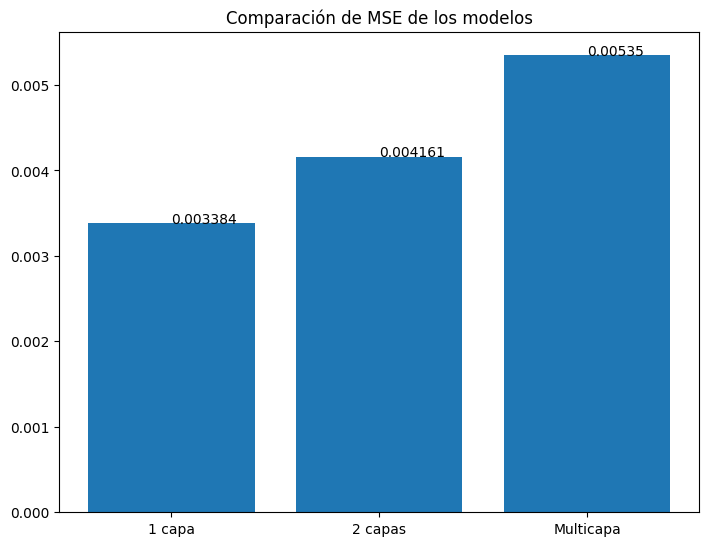

In [31]:
import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.set_title("Comparación de MSE de los modelos")
ejeX = ['1 capa' ,'2 capas', 'Multicapa']
ejeY = np.round([p1,p2,p3],6)
ax.bar(ejeX,ejeY)
def addlabels(x,y,plotP):
    for i in range(len(x)):
        plotP.text(i,y[i],y[i])
addlabels(ejeX,ejeY,plt)
plt.show()

VENTAJAS MEJOR MODELO: El modelo de una capa es mucho más simple que los otros modelos con múltiples capas. Como resultado, es más fácil de entrenar, implementar y depurar, lo que lo hace una buena opción para aplicaciones en las que se necesitan resultados rápidos y una alta eficiencia computacional. Además, como tiene menos parámetros que los otros modelos, es menos propenso al sobreajuste, lo que significa que el modelo puede generalizar mejor a datos nuevos y no vistos durante el entrenamiento. Por lo tanto, el modelo de una capa puede ser una buena opción para conjuntos de datos pequeños, donde la cantidad de datos de entrenamiento es limitada. Este tipo de redes neuronales de una sola capa, son muy útiles en problemas de clasificación binaria. 

DESVENTAJAS PEOR MODELO:  El modelo multicapa a medida que se agregan más capas se vuelve más complejo y más difícil de entrenar. Esto se debe a que las capas intermedias pueden capturar patrones complejos en los datos, pero también pueden crear ruido y errores en las predicciones si no se ajustan adecuadamente. Además, la optimización de múltiples capas puede requerir más recursos computacionales y tiempo de entrenamiento.Otra desventaja es el riesgo de sobreajuste, especialmente cuando se utilizan conjuntos de datos pequeños. Debido a que el modelo tiene más parámetros, puede ajustarse demasiado a los datos de entrenamiento y no generalizar bien a nuevos datos. Esto puede llevar a una baja precisión en las predicciones y una falta de capacidad para manejar datos nuevos y no vistos.